<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, pearsonr, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()
# Task 1: Familiarize with the dataset
print("Dataset Head:")
print(boston_df.head())
print("\nDataset Info:")
print(boston_df.info())
print("\nSummary Statistics:")
print(boston_df.describe())


Dataset Head:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    fl

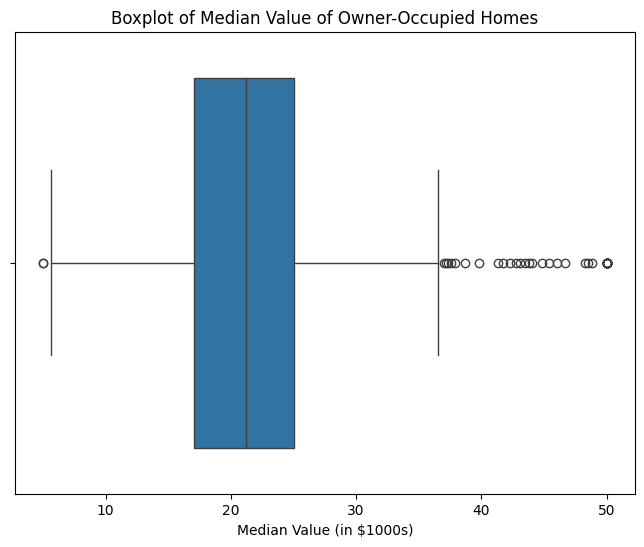

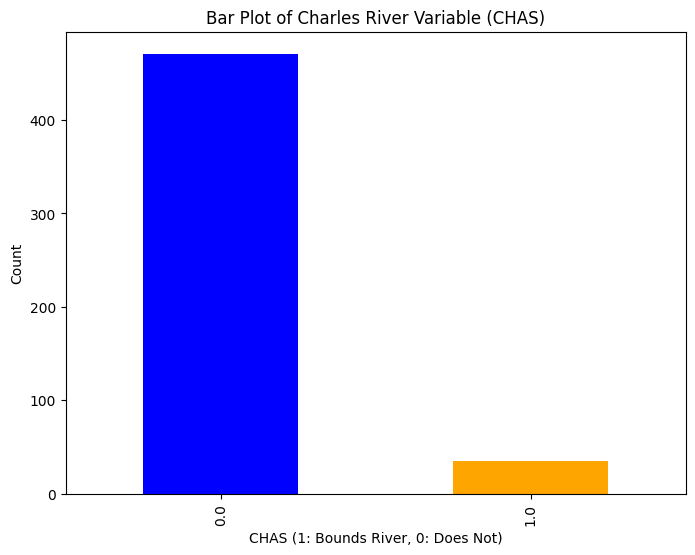

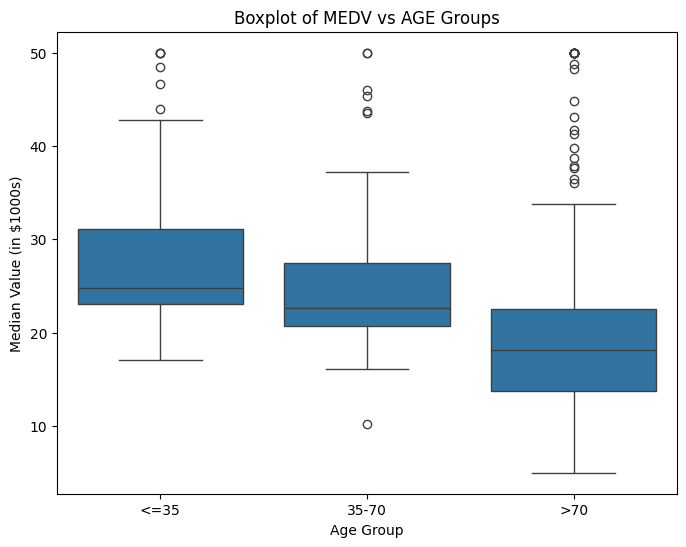

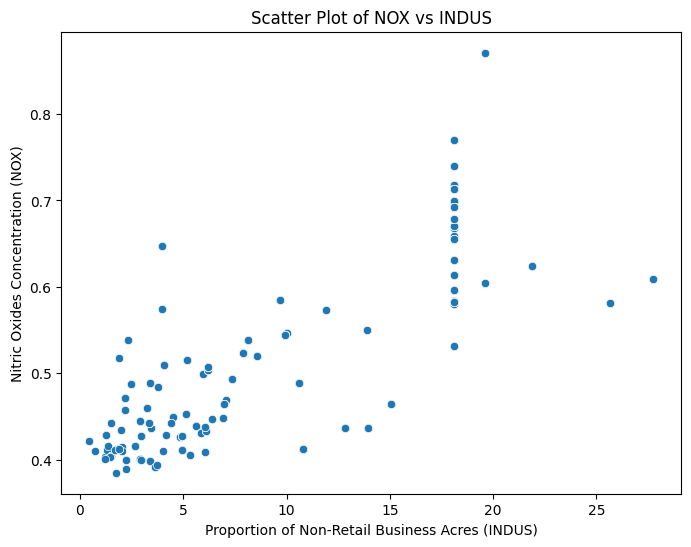

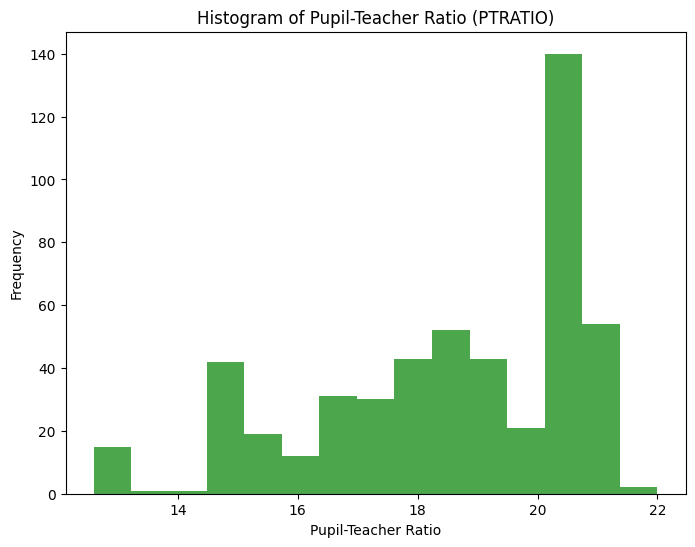

In [4]:
# Task 2: Descriptive Statistics and Visualizations

# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (in $1000s)')
plt.show()

# Bar plot for CHAS
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1: Bounds River, 0: Does Not)')
plt.ylabel('Count')
plt.show()

# Boxplot for MEDV vs Discretized AGE
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [5]:
# Task 3: Statistical Tests

# T-Test: MEDV for CHAS
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(chas_1, chas_0)
print("T-Test Results:")
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("There is a significant difference in MEDV for houses bounded by the Charles River.")
else:
    print("There is no significant difference in MEDV for houses bounded by the Charles River.")

# ANOVA: MEDV Across AGE Groups
group1 = boston_df[boston_df['AGE_Group'] == '<=35']['MEDV']
group2 = boston_df[boston_df['AGE_Group'] == '35-70']['MEDV']
group3 = boston_df[boston_df['AGE_Group'] == '>70']['MEDV']

anova_stat, anova_p_val = f_oneway(group1, group2, group3)
print("\nANOVA Results:")
print(f"F-statistic: {anova_stat}, P-value: {anova_p_val}")
if anova_p_val < 0.05:
    print("There is a significant difference in MEDV across age groups.")
else:
    print("There is no significant difference in MEDV across age groups.")

# Pearson Correlation: NOX and INDUS
correlation, p_val_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation Results:")
print(f"Correlation Coefficient: {correlation}, P-value: {p_val_corr}")
if p_val_corr < 0.05:
    print("There is a significant correlation between NOX and INDUS.")
else:
    print("There is no significant correlation between NOX and INDUS.")

# Regression Analysis: DIS on MEDV
X = boston_df['DIS'].values.reshape(-1, 1)
y = boston_df['MEDV']

reg_model = LinearRegression()
reg_model.fit(X, y)

predictions = reg_model.predict(X)

r2 = r2_score(y, predictions)
print("\nRegression Analysis Results:")
print(f"Coefficient: {reg_model.coef_[0]}, Intercept: {reg_model.intercept_}, R-squared: {r2}")
print("An additional unit of weighted distance to employment centers decreases MEDV by approximately {:.2f}".format(reg_model.coef_[0]))


T-Test Results:
T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
There is a significant difference in MEDV for houses bounded by the Charles River.

ANOVA Results:
F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
There is a significant difference in MEDV across age groups.

Pearson Correlation Results:
Correlation Coefficient: 0.7636514469209151, P-value: 7.913361061239527e-98
There is a significant correlation between NOX and INDUS.

Regression Analysis Results:
Coefficient: 1.0916130158411088, Intercept: 18.390088330493388, R-squared: 0.062464372121782574
An additional unit of weighted distance to employment centers decreases MEDV by approximately 1.09
